In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv("F:/netflix_titles.csv")

In [6]:
df.shape

(6234, 12)

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [33]:
print("The Percentage of Values in the column Director which is null : ")
(df['director'].isnull().sum()/df['director'].count())*100

The Percentage of Values in the column Director which is null : 


46.16647127784291

Since close to half the data has null values, we will be careful while analysing the column.

In [10]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [18]:
df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

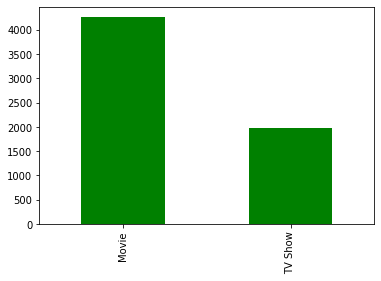

In [14]:
df['type'].value_counts().plot(kind='bar',color = 'g')
plt.show()

What we se here is that Netflix has released a lot more movies than TV shows.

In [17]:
df['listed_in']

0                      Children & Family Movies, Comedies
1                                         Stand-Up Comedy
2                                                Kids' TV
3                                                Kids' TV
4                                                Comedies
                              ...                        
6229    TV Action & Adventure, TV Comedies, TV Sci-Fi ...
6230                                          TV Comedies
6231                                               Movies
6232             British TV Shows, TV Comedies, TV Dramas
6233                       Classic & Cult TV, TV Comedies
Name: listed_in, Length: 6234, dtype: object

In [20]:
df['country'].value_counts().head()

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
Name: country, dtype: int64

Here, we get a basic idea of the number of films/shows that have been released by by the top 5 countries broadcasting
their content on Netflix.

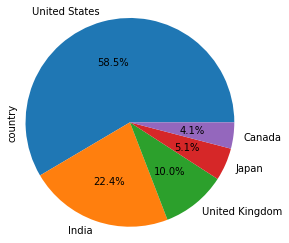

In [58]:
df['country'].value_counts().head().plot(kind = 'pie', autopct = '%.1f%%', radius = 1.2)
plt.show()

We can make the inference that The United States makes the highest contribution towards content on the platform
followed by India and the United Kingdom

In [56]:
df['release_year'].value_counts().head()

2018    1063
2017     959
2019     843
2016     830
2015     517
Name: release_year, dtype: int64

In [51]:
a = df[df['release_year'] == 2019]
b = df[df['release_year'] == 2018]
c = df[df['release_year'] == 2017]

We have segregated the data into groups having data only for their corresponding year

We have then grouped the data with repect to type of content, Movie/Tv Show

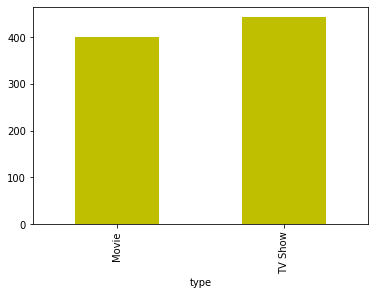

In [50]:
a.groupby(['type'])['release_year'].agg('count').plot(kind='bar', stacked = False, color = 'y')
plt.show()

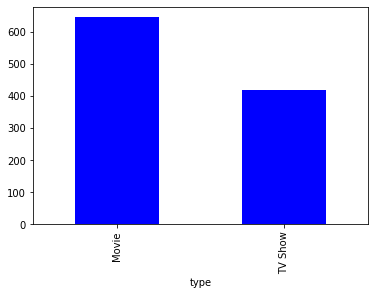

In [53]:
b.groupby(['type'])['release_year'].agg('count').plot(kind='bar', stacked = False, color = 'b')
plt.show()

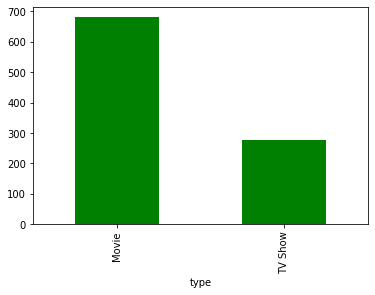

In [55]:
c.groupby(['type'])['release_year'].agg('count').plot(kind='bar', stacked = False, color = 'g')
plt.show()

From the above Bar Graphs we can conclude that in 2019, Tv shows for the first time in three years had more shows on the
streaming giant than movies. After almost similar number of shows in the preceding two years, the last year 
had Netflix showing more binge content than standalone films.

In [82]:
India_Movie = df[(df['country'] == 'India') & (df['release_year'] == 2019) & (df['type'] == 'Movie')]
India_TvShow = df[(df['country'] == 'India') & (df['release_year'] == 2019) & (df['type'] == 'TV Show')]

In [88]:
India_Movie['duration'].dtype

dtype('O')

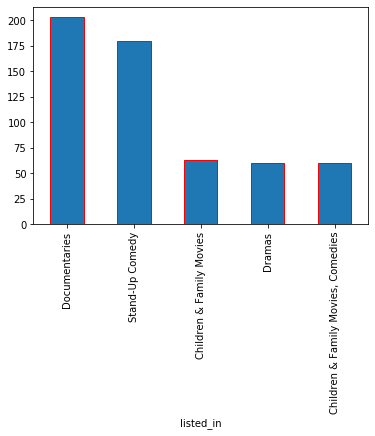

In [146]:
unsorted_US = df[(df['country'] == 'United States')].groupby(['listed_in'])['show_id'].agg('count')
sorted_US = unsorted_US.sort_values(ascending = False)
sorted_US.head().plot(kind = 'bar', edgecolor = 'r')
plt.show()

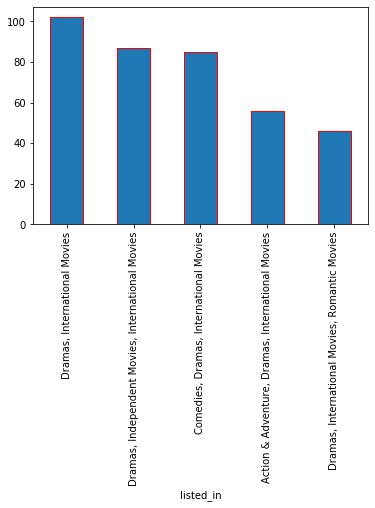

In [147]:
unsorted_IND = df[(df['country'] == 'India')].groupby(['listed_in'])['show_id'].agg('count')
sorted_IND = unsorted_IND.sort_values(ascending = False)
sorted_IND.head().plot(kind = 'bar', edgecolor = 'r')
plt.show()

What we can observe in the above performed EDA is that the top 2 content contributing countries have different 
types of contribution in terms of content! 
While Documentaries had the highest contribution towards in the Us; Dramas topped the list of Indian Content contribution.